# 2. Sepsis Dataset 
# IMBALANCE PROPERTIES: MODERATE

**Vital signs (columns 1-8)** <br>
HR - Heart rate (beats per minute); <br>
O2Sat - Pulse oximetry (%); <br>
Temp - Temperature (Deg C)<br>
SBP - Systolic BP (mm Hg)<br>
MAP - Mean arterial pressure (mm Hg)<br>
DBP - Diastolic BP (mm Hg)<br>
Resp - Respiration rate (breaths per minute)<br>
EtCO2 - End tidal carbon dioxide (mm Hg)<br><br>
**Laboratory values (columns 9-34)**<br>
BaseExcess - Measure of excess bicarbonate (mmol/L)<br>
HCO3 - Bicarbonate (mmol/L)<br>
FiO2 - Fraction of inspired oxygen (%)<br>
pH - N/A<br>
PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)<br>
SaO2 - Oxygen saturation from arterial blood (%)<br>
AST - Aspartate transaminase (IU/L)<br>
BUN - Blood urea nitrogen (mg/dL)<br>
Alkalinephos - Alkaline phosphatase (IU/L)<br>
Calcium - (mg/dL)<br>
Chloride - (mmol/L)<br>
Creatinine - (mg/dL)<br>
Bilirubin_direct - Bilirubin direct (mg/dL)<br>
Glucose - Serum glucose (mg/dL)<br>
Lactate - Lactic acid (mg/dL)<br>
Magnesium - (mmol/dL)<br>
Phosphate - (mg/dL)<br>
Potassium - (mmol/L)<br>
Bilirubin_total - Total bilirubin (mg/dL)<br>
TroponinI - Troponin I (ng/mL)<br>
Hct - Hematocrit (%)<br>
Hgb - Hemoglobin (g/dL)<br>
PTT - partial thromboplastin time (seconds)<br>
WBC - Leukocyte count (count*10^3/µL)<br>
Fibrinogen - (mg/dL)<br>
Platelets - (count*10^3/µL)<br><br>
**Demographics (columns 35-40)**<br>
Age - Years (100 for patients 90 or above)<br>
Gender - Female (0) or Male (1)<br>
Unit1 - Administrative identifier for ICU unit (MICU)<br>
Unit2 - Administrative identifier for ICU unit (SICU)<br>
HospAdmTime - Hours between hospital admit and ICU admit<br>
ICULOS - ICU length-of-stay (hours since ICU admit)<br><br>
**Outcome (column 41)** <br>
SepsisLabel - For sepsis patients, `SepsisLabel` is $1$ if $t≥t_{sepsis}-6$ and $0$ if $t<t_{sepsis}−6$. <br>
For non-sepsis patients, `SepsisLabel` is $0$.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

# Contents
1. [Exploratory Data Analysis](#EDA)
2. [Feature Importance](#FI)
3. [Feature Normalization](#FE)
4. [Sampling Techniques](#ST)
5. [Modelling](#Mo)
6. [Model Evaluation](#MOE)
7. [Results](#RS)
    1. [Support Vector Machine (SVM)](#SVM)
    2. [Decision Tree (DT)](#DT)
    3. [Gaussian Naïve Bayes (GNB)](#GNB)
    4. [K-Nearest Neighbourhood (KNN)](#KNN)
    5. [Logistic Regression (LR)](#LR)

---

<a id="EDA"></a>
# 1. Exploratory Data Analysis

## Load and Clean Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path, copy the path from your Drive
#path = '/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/external/'
path = '/content/drive/My Drive/Colab Notebooks/ClassImbalance_MedicalDatasets/data/'

In [4]:
data = pd.read_csv(path+'sepsis.csv', sep=';', encoding='utf-8')
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,NaN,NaN,NaN,NaN,30.0,NaN,21.0,45.0,...,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,NaN,22.0,...,11.0,NaN,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,NaN,NaN,31.0,...,8.3,NaN,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,...,12.0,NaN,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,NaN,147.5,102.0,NaN,33.0,NaN,-12.0,13.0,...,9.3,NaN,26.0,64.24,1,1.0,0.0,-0.05,2,0


In [5]:
data.sample(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
2462,92.0,96.0,NaN,126.0,73.0,48.0,12.0,NaN,2.0,23.0,...,16.5,NaN,329.0,62.04,1,NaN,NaN,-11.29,7,0
2051,89.0,100.0,37.05,117.0,73.0,57.0,17.0,NaN,-5.0,18.0,...,11.3,182.0,83.0,54.26,1,NaN,NaN,-0.03,16,0
18949,116.0,95.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,0.2,NaN,35.0,48.00,1,0.0,1.0,-0.11,3,0
25192,61.0,96.0,36.60,116.0,76.0,63.0,17.0,NaN,NaN,NaN,...,7.7,NaN,238.0,68.00,1,NaN,NaN,-4.36,12,0
20678,109.0,93.0,NaN,117.0,87.0,71.0,22.0,NaN,NaN,NaN,...,18.9,NaN,605.0,43.00,0,1.0,0.0,-2.10,13,0


In [6]:
data.tail(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
36297,59.0,95.0,NaN,154.0,110.0,82.0,14.0,NaN,NaN,NaN,...,7.0,NaN,154.0,76.0,1,0.0,1.0,-14.90,19,0
36298,81.0,99.0,NaN,122.0,71.0,58.0,20.0,NaN,NaN,NaN,...,12.6,NaN,238.0,84.0,0,NaN,NaN,-6.69,25,0
36299,76.0,96.0,36.3,118.0,79.0,68.0,14.0,NaN,NaN,NaN,...,10.8,NaN,201.0,30.0,1,NaN,NaN,-0.02,2,0
36300,76.0,89.0,NaN,145.0,102.0,74.0,NaN,NaN,NaN,NaN,...,12.5,NaN,188.0,60.0,0,1.0,0.0,-53.64,15,0
36301,98.0,99.0,NaN,152.0,119.0,84.0,18.0,NaN,NaN,NaN,...,6.8,NaN,230.0,62.0,0,NaN,NaN,0.00,4,0


In [7]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'isSepsis'],
      dtype='object')

In [8]:
#Descriptive or summary statistics of numeric columns
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
count,35506.000000,34736.000000,17101.000000,34617.000000,34846.000000,27917.000000,33890.000000,1613.000000,7184.000000,16984.000000,...,31460.000000,2141.000000,31469.000000,36302.000000,36302.000000,22221.000000,22221.000000,36302.000000,36302.000000,36302.000000
mean,83.547246,97.444337,36.824187,122.625064,82.263649,63.793506,18.041841,32.402046,-0.306508,24.255841,...,11.094782,294.154367,208.785297,61.676240,0.559363,0.495072,0.504928,-51.437230,16.982315,0.072916
std,17.486670,2.827282,0.855630,23.092558,16.876642,14.130816,5.020912,7.947214,4.151943,4.150083,...,6.939193,154.603297,101.953073,16.454453,0.496470,0.499987,0.499987,136.981879,22.731072,0.260002
min,26.000000,27.000000,26.670000,32.000000,20.000000,22.000000,1.000000,10.000000,-29.000000,5.000000,...,0.100000,34.000000,2.000000,14.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000
25%,71.000000,96.000000,36.300000,106.000000,71.000000,54.000000,15.000000,28.000000,-2.000000,22.000000,...,7.400000,188.000000,143.000000,51.000000,0.000000,0.000000,0.000000,-43.510000,6.000000,0.000000
50%,82.000000,98.000000,36.800000,120.000000,80.000000,62.000000,18.000000,33.000000,0.000000,24.000000,...,10.050000,252.000000,193.000000,63.150000,1.000000,0.000000,1.000000,-6.060000,11.000000,0.000000
75%,94.000000,100.000000,37.390000,137.000000,91.330000,72.000000,20.500000,37.500000,2.000000,26.000000,...,13.400000,364.000000,255.000000,74.000000,1.000000,1.000000,1.000000,-0.040000,20.000000,0.000000
max,184.000000,100.000000,41.800000,281.000000,291.000000,281.000000,59.000000,97.000000,36.000000,55.000000,...,387.000000,1051.000000,2322.000000,100.000000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000


In [9]:
#Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                35506 non-null  float64
 1   O2Sat             34736 non-null  float64
 2   Temp              17101 non-null  float64
 3   SBP               34617 non-null  float64
 4   MAP               34846 non-null  float64
 5   DBP               27917 non-null  float64
 6   Resp              33890 non-null  float64
 7   EtCO2             1613 non-null   float64
 8   BaseExcess        7184 non-null   float64
 9   HCO3              16984 non-null  float64
 10  FiO2              6427 non-null   float64
 11  pH                9221 non-null   float64
 12  PaCO2             8430 non-null   float64
 13  SaO2              4335 non-null   float64
 14  AST               10391 non-null  float64
 15  BUN               32526 non-null  float64
 16  Alkalinephos      10269 non-null  float6

In [10]:
#Returns the dimensions of the array
#Rows & Columns
data.shape

(36302, 41)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


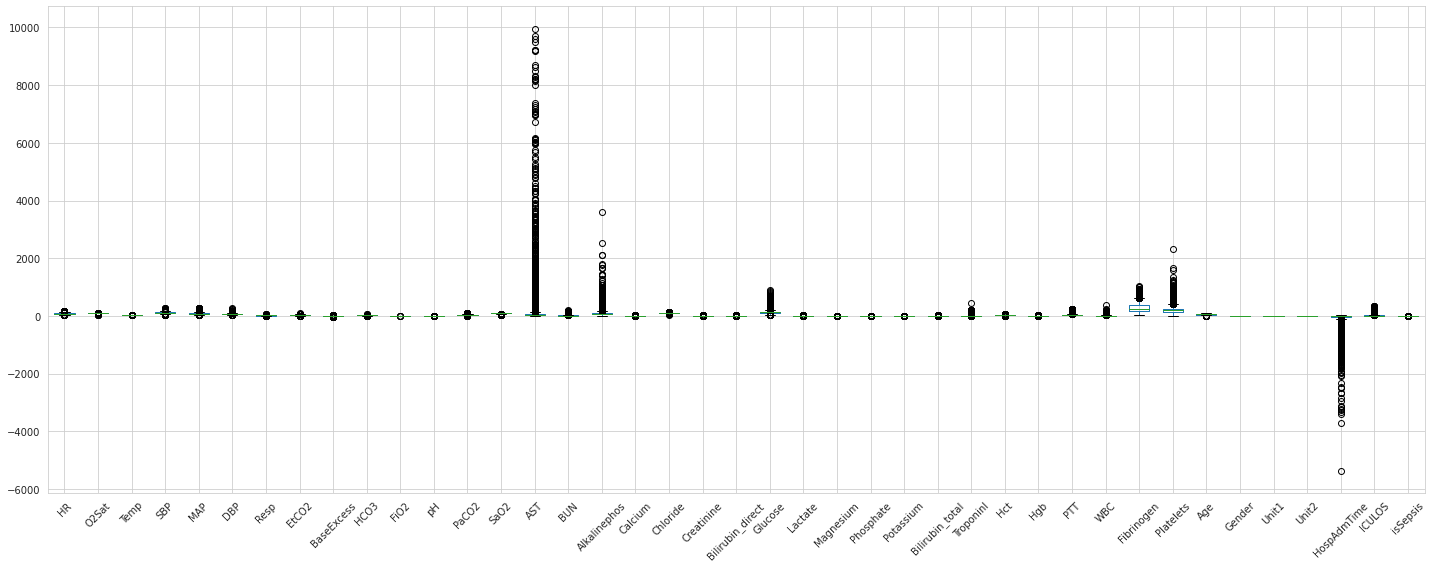

In [11]:
plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
data.boxplot(widths = 0.6, rot=45);

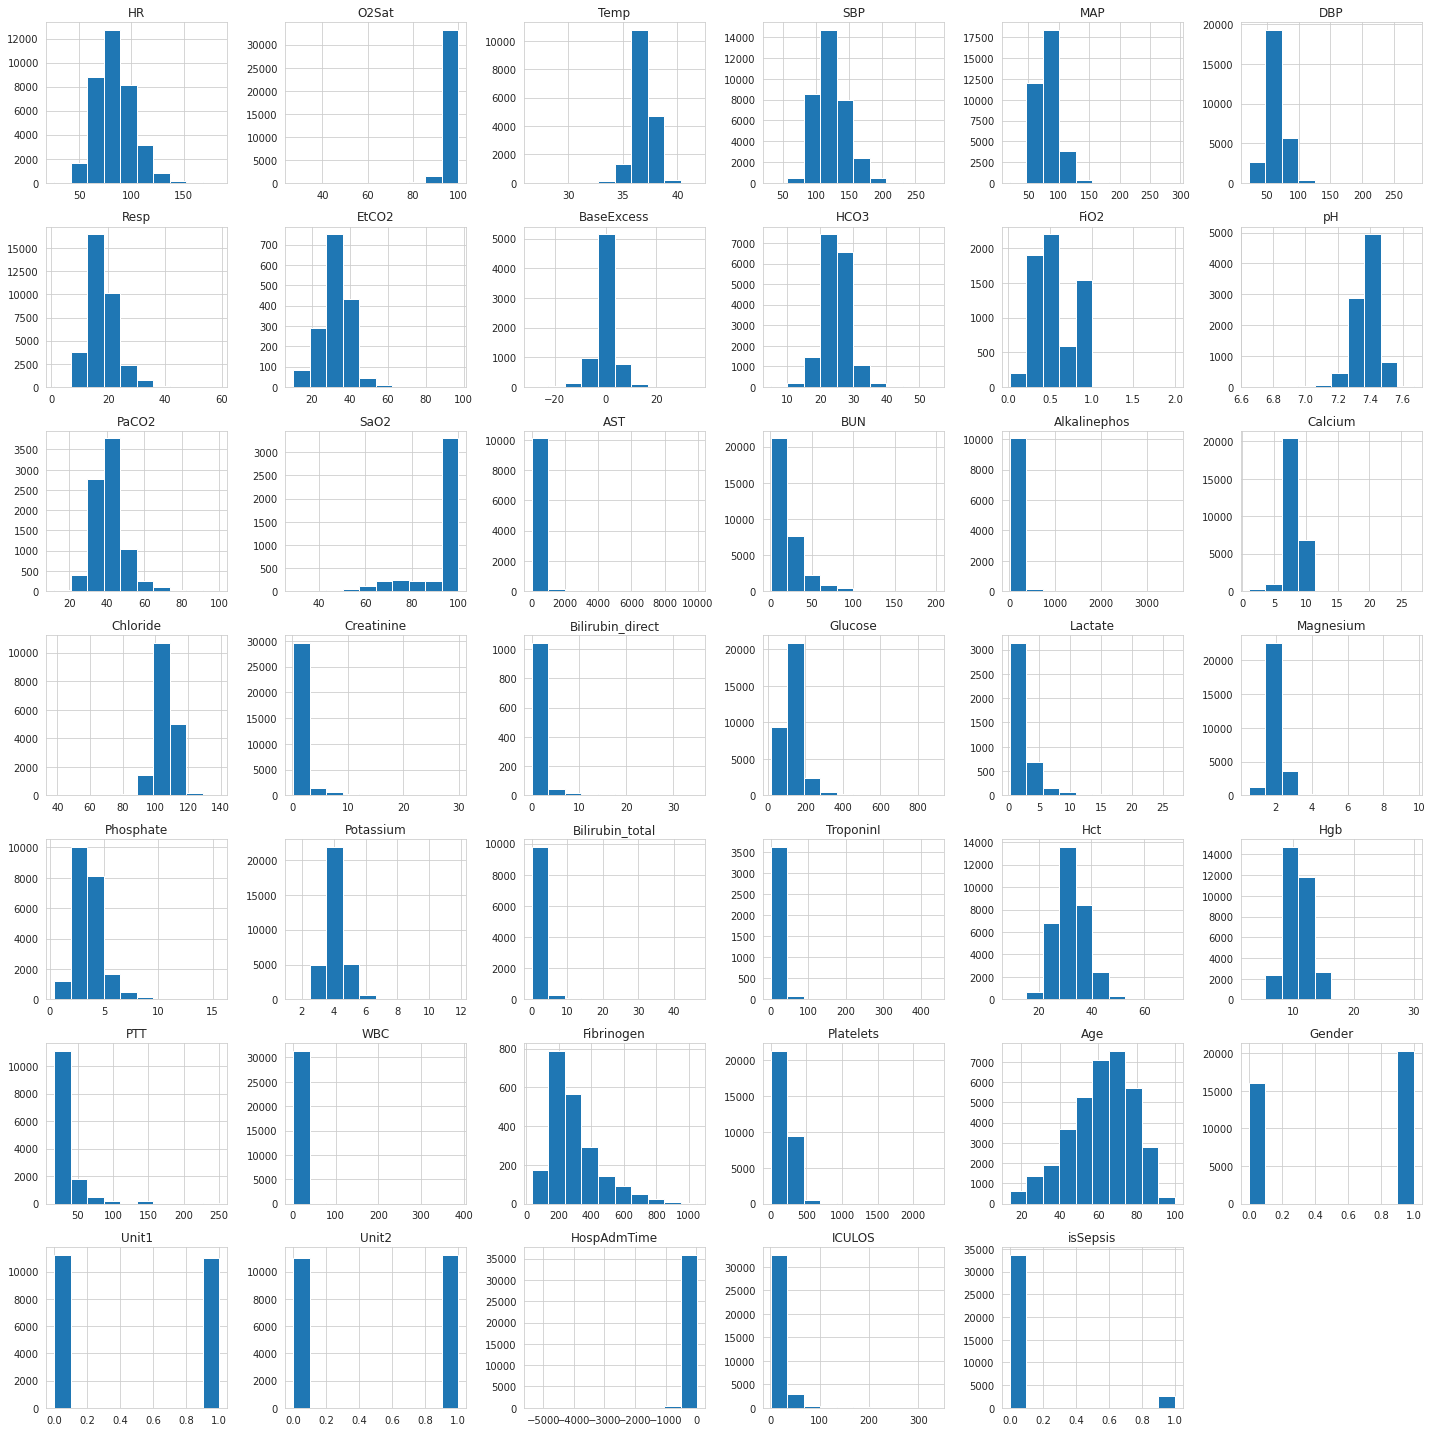

In [12]:
#Representation of the distribution of data
data.hist(figsize=[20,20]);

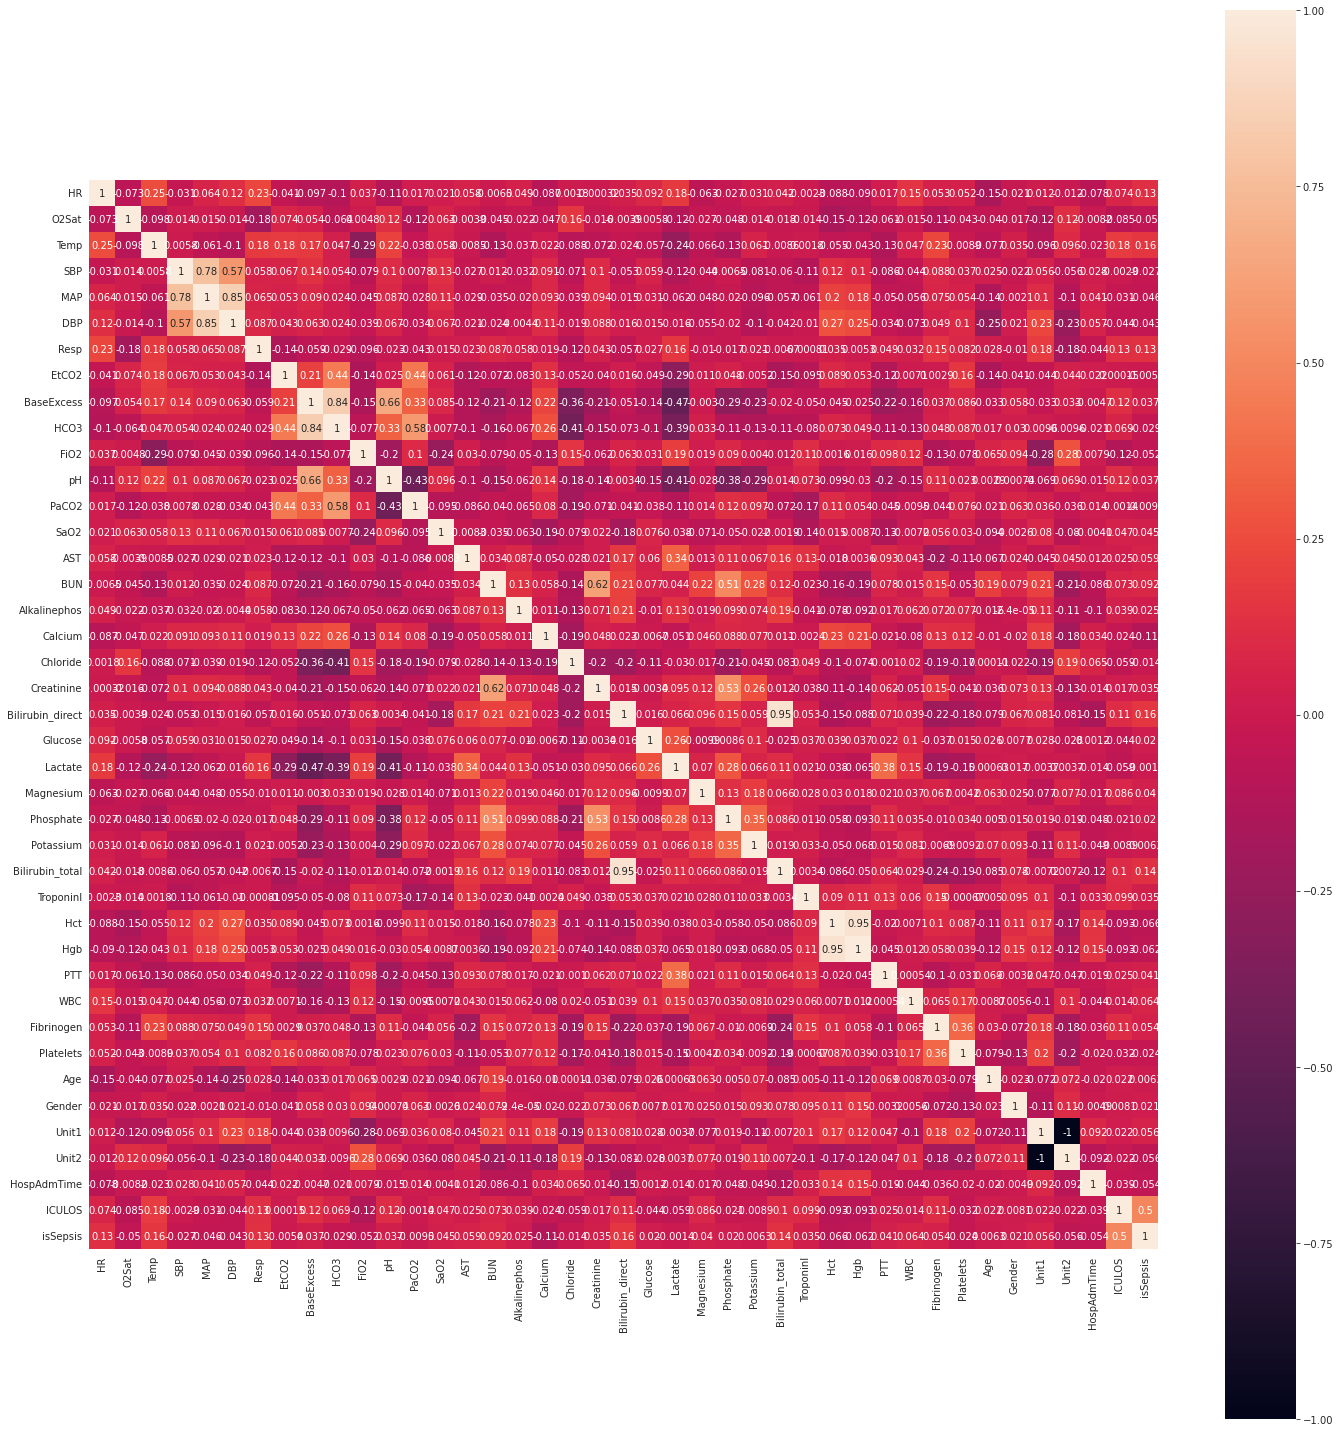

In [13]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrMatrix, square=True, annot=True, ax=ax)
plt.show()

In [14]:
#Percentage of NAN Values
data.isna().mean().round(4) * 100

HR                   2.19
O2Sat                4.31
Temp                52.89
SBP                  4.64
MAP                  4.01
DBP                 23.10
Resp                 6.64
EtCO2               95.56
BaseExcess          80.21
HCO3                53.21
FiO2                82.30
pH                  74.60
PaCO2               76.78
SaO2                88.06
AST                 71.38
BUN                 10.40
Alkalinephos        71.71
Calcium             21.15
Chloride            52.17
Creatinine          11.13
Bilirubin_direct    96.88
Glucose              8.39
Lactate             88.61
Magnesium           23.78
Phosphate           40.04
Potassium            9.90
Bilirubin_total     71.59
TroponinI           89.68
Hct                 11.35
Hgb                 12.36
PTT                 61.78
WBC                 13.34
Fibrinogen          94.10
Platelets           13.31
Age                  0.00
Gender               0.00
Unit1               38.79
Unit2               38.79
HospAdmTime 

In [15]:
#Number of NAN Values
data.isna().sum()

HR                    796
O2Sat                1566
Temp                19201
SBP                  1685
MAP                  1456
DBP                  8385
Resp                 2412
EtCO2               34689
BaseExcess          29118
HCO3                19318
FiO2                29875
pH                  27081
PaCO2               27872
SaO2                31967
AST                 25911
BUN                  3776
Alkalinephos        26033
Calcium              7679
Chloride            18937
Creatinine           4042
Bilirubin_direct    35170
Glucose              3045
Lactate             32168
Magnesium            8631
Phosphate           14534
Potassium            3593
Bilirubin_total     25989
TroponinI           32556
Hct                  4122
Hgb                  4486
PTT                 22427
WBC                  4842
Fibrinogen          34161
Platelets            4833
Age                     0
Gender                  0
Unit1               14081
Unit2               14081
HospAdmTime 

### Missing Values

In [16]:
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

In [17]:
data.drop(['BaseExcess','pH','PaCO2','SaO2','AST','Alkalinephos','Bilirubin_direct','Lactate','Bilirubin_total','TroponinI','Fibrinogen'], axis=1, inplace=True)

In [18]:
cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 
        'HCO3', 'FiO2', 'BUN', 'Calcium', 'Chloride', 'Creatinine', 
        'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Hct', 
        'Hgb', 'PTT', 'WBC', 'Platelets', 'Unit1', 'Unit2']

imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(data[cols])
data[cols] = imputer.transform(data[cols])

ICULOS
Temp
BUN
Plateles
WBC
HospAdminTime
HR
Creatinine
FiO2
Hgb
SBP
Unit1
Resp
Calcium
MAP
Glucose
HCO3
DBP
EtCO2
O2Sat

### Checking cleaning process

In [19]:
data.isna().mean().round(4) * 100

HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
MAP            0.0
DBP            0.0
Resp           0.0
EtCO2          0.0
HCO3           0.0
FiO2           0.0
BUN            0.0
Calcium        0.0
Chloride       0.0
Creatinine     0.0
Glucose        0.0
Magnesium      0.0
Phosphate      0.0
Potassium      0.0
Hct            0.0
Hgb            0.0
PTT            0.0
WBC            0.0
Platelets      0.0
Age            0.0
Gender         0.0
Unit1          0.0
Unit2          0.0
HospAdmTime    0.0
ICULOS         0.0
isSepsis       0.0
dtype: float64

In [20]:
data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,HCO3,FiO2,...,PTT,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,isSepsis
0,103.0,90.0,36.80,120.0,80.0,62.0,30.0,33.0,45.0,0.5,...,30.7,5.7,317.0,83.14,0,0.0,1.0,-0.03,17,0
1,58.0,95.0,36.11,143.0,77.0,47.0,11.0,33.0,22.0,0.5,...,30.7,11.0,158.0,75.91,0,0.0,1.0,-98.60,10,0
2,91.0,94.0,38.50,133.0,74.0,48.0,34.0,33.0,31.0,0.8,...,30.5,8.3,465.0,45.82,0,1.0,0.0,-1195.71,11,0
3,92.0,100.0,36.80,120.0,80.0,62.0,18.0,33.0,29.0,0.5,...,30.7,12.0,298.0,52.01,1,1.0,0.0,-0.03,13,0
4,155.5,94.5,36.80,147.5,102.0,62.0,33.0,33.0,13.0,1.0,...,26.6,9.3,26.0,64.24,1,1.0,0.0,-0.05,2,0


In [21]:
data.shape

(36302, 30)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           36302 non-null  float64
 1   O2Sat        36302 non-null  float64
 2   Temp         36302 non-null  float64
 3   SBP          36302 non-null  float64
 4   MAP          36302 non-null  float64
 5   DBP          36302 non-null  float64
 6   Resp         36302 non-null  float64
 7   EtCO2        36302 non-null  float64
 8   HCO3         36302 non-null  float64
 9   FiO2         36302 non-null  float64
 10  BUN          36302 non-null  float64
 11  Calcium      36302 non-null  float64
 12  Chloride     36302 non-null  float64
 13  Creatinine   36302 non-null  float64
 14  Glucose      36302 non-null  float64
 15  Magnesium    36302 non-null  float64
 16  Phosphate    36302 non-null  float64
 17  Potassium    36302 non-null  float64
 18  Hct          36302 non-null  float64
 19  Hgb 

In [23]:
#Save clean data set
# Path, copy the path from your Drive
# path = '/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/processed/'
path = '/content/drive/My Drive/Colab Notebooks/ClassImbalance_MedicalDatasets/data/'
data.to_csv(path+'sepsis_processed.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36302 entries, 0 to 36301
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           36302 non-null  float64
 1   O2Sat        36302 non-null  float64
 2   Temp         36302 non-null  float64
 3   SBP          36302 non-null  float64
 4   MAP          36302 non-null  float64
 5   DBP          36302 non-null  float64
 6   Resp         36302 non-null  float64
 7   EtCO2        36302 non-null  float64
 8   HCO3         36302 non-null  float64
 9   FiO2         36302 non-null  float64
 10  BUN          36302 non-null  float64
 11  Calcium      36302 non-null  float64
 12  Chloride     36302 non-null  float64
 13  Creatinine   36302 non-null  float64
 14  Glucose      36302 non-null  float64
 15  Magnesium    36302 non-null  float64
 16  Phosphate    36302 non-null  float64
 17  Potassium    36302 non-null  float64
 18  Hct          36302 non-null  float64
 19  Hgb 

## Label

In [25]:
data['isSepsis'].value_counts()

0    33655
1     2647
Name: isSepsis, dtype: int64

In [26]:
print('Percentage of Imbalance Property: {:.2f}%'.format((data['isSepsis'].value_counts()[1] * 100 / data['isSepsis'].value_counts()[0])))

Percentage of Imbalance Property: 7.87%


---

<a id="FI"></a>
# 2. Feature Importance

## Sepsis classification with LightGBM - SHAP

In [27]:
# !conda install lightgbm -y -U
# !pip install shap

In [28]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Light GBM is a gradient boosting framework that uses tree based learning algorithm
import shap

# print the JS visualization code to the notebook
shap.initjs()

### Load dataset

In [29]:
X_ = data.drop('isSepsis', axis=1)
y_ = data['isSepsis']

# create a train/test split
train_x, test_x, train_y, test_y = train_test_split(X_,y_, test_size = 0.2,random_state=7)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(29041, 29) (29041,)
(7261, 29) (7261,)


In [30]:
d_train = lgb.Dataset(train_x, label=train_y)
d_test = lgb.Dataset(test_x, label=test_y)

### Train the model

In [31]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[258]	valid_0's binary_logloss: 0.0998764


### Explain predictions

In [32]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


#### SHAP Summary Plot

ICULOS
Temp
BUN
Plateles
WBC
HospAdminTime
HR
Creatinine
FiO2
Hgb
SBP
Unit1
Resp
Calcium
MAP
Glucose
HCO3
DBP
EtCO2
O2Sat

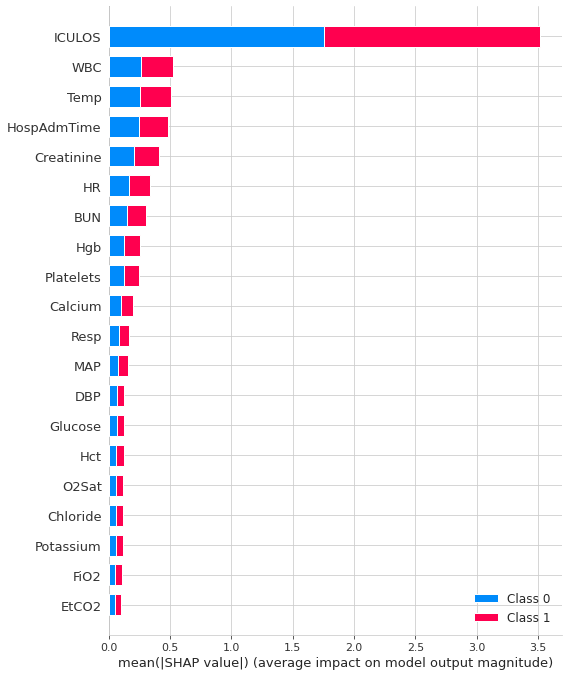

In [33]:
shap.summary_plot(shap_values, X_)

---

<a id="FE"></a>
# 3. Feature Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [35]:
# separate the columns into target and predictors 
X = data.drop('isSepsis', axis=1).values
y = data['isSepsis']

In [36]:
# split the dataset into a training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=13)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (29041, 29) (29041,)
Test: (7261, 29) (7261,)


In [37]:
# perform a robust scaler transform of the dataset
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

---

<a id="ST"></a>
# 4. Sampling Techniques

In [38]:
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss,  TomekLinks, EditedNearestNeighbours

In [39]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the classifier learns to predict probabilities for the examples to belong to class 1

def evaluate_model(X_train, X_test, y_train, y_test, model):
    """  
    
    Args:
        X_train, X_test, y_train, y_test
        model: 
    
    Return:
        results: {
            accuracy
            precision, recall, fscore 
            n_occurences
            predictions_count
            tp - true positive
            tn - true negative
            fp - false positive
            fn - false negative
            auc - area under the curve
            }
    """
    
    model.fit(X_train, y_train)
    # compute exact prediction for the evaluation set
    predictions = model.predict(X_test)
    # compute accuracy
    accuracy = accuracy_score(y_test, predictions)   
    # compute precision, recall and f1 score
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions)    
    # compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()    
    # compute fpr and tpr values for various thresholds 
    # by comparing the true target values to the predicted probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label = 1) 
    # compute the area under the curve
    auc_ = auc(fpr, tpr)
    
    result = {'accuracy': accuracy,
              'precision':precision,
              'recall':recall,
              'fscore':fscore, 
              'n_occurences':support,
              'predictions_count': Counter(predictions),
              'tp':tp, 
              'tn':tn, 
              'fp':fp,
              'fn':fn, 
              'auc':auc_}
    
    return result

In [40]:
def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    """ 
    
    Args:
        X_train: 
        X_test: 
        y_train: 
        y_test: 
        model: 
        
    Return:
        results: 
    """
    
    results = {'ordinary':{},
               'class_weight':{},
               'oversample':{},
               'undersample':{}}
    
    # ------- Original ----------
    results['ordinary'] = evaluate_model(X_train, X_test, y_train, y_test, model)
    
    # ------- Class weight -------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        results['class_weight'] = evaluate_model(X_train, X_test, y_train, y_test, model)
    
    # ------ OverSampling techniques -----
    print('-------- Oversampling methods ---------')
    techniques = [RandomOverSampler(), SMOTE()] # ADASYN() 
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['oversample'][technique] = evaluate_model(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ UnderSampling techniques --------
    print('-------- Undersampling methods ---------')
    techniques = [RandomUnderSampler(), 
                 NearMiss(version=1),
                 TomekLinks()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['undersample'][technique] = evaluate_model(X_resampled, X_test, y_resampled, y_test, model)
    
    return results

---

<a id="Mo"></a>
# 5. Modelling

In [41]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

---

<a id="MOE"></a>
# 6. Model Evaluation

In [42]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    """     
    Args:
        results: 
        method: oversample, undersample
        metrics: precision, recall, fscore
    
    Return:
        None
    """
    fig, ax = plt.subplots(1, 4, sharey = True, figsize=(20,6)) 
    
    for i, metric in enumerate(metrics):
        ax[i].axhline(results['ordinary'][metric][0], label = 'No Resampling')
        
        if results['class_weight']:
            ax[i].bar(0, results['class_weight'][metric][0], label = 'Adjust Class Weight')
            
        ax[0].legend()
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i].bar(j+1, result[metric][0], label = technique)
            
        ax[i].set_title(f'Diabetes:\n{metric}')
        
    # Area Under the Curve
    ax[3].set_title(f'Area under curve')
    ax[3].axhline(results['ordinary']['auc'], label = 'No Resampling')
    if results['class_weight']:
        ax[3].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[3].bar(j+1, result['auc'], label= technique)

In [43]:
def metrics(results):
    first = results.get('ordinary')
    metrics_ord = np.array([first['accuracy'], first['precision'], first['recall'], first['fscore'], 
                       first['n_occurences'], first['predictions_count'], first['tp'], first['tn'], 
                       first['fp'], first['fn'], first['auc']], dtype=object)
    second = results.get('oversample')
    metrics_ros = np.array([second['RandomOverSampler']['accuracy'], second['RandomOverSampler']['precision'], 
                            second['RandomOverSampler']['recall'], second['RandomOverSampler']['fscore'], second['RandomOverSampler']['n_occurences'], 
                            second['RandomOverSampler']['predictions_count'], second['RandomOverSampler']['tp'], second['RandomOverSampler']['tn'], 
                            second['RandomOverSampler']['fp'], second['RandomOverSampler']['fn'], second['RandomOverSampler']['auc']], dtype=object)
    metrics_smote = np.array([second['SMOTE']['accuracy'], second['SMOTE']['precision'], second['SMOTE']['recall'], second['SMOTE']['fscore'], 
                              second['SMOTE']['n_occurences'], second['SMOTE']['predictions_count'], second['SMOTE']['tp'], second['SMOTE']['tn'], 
                              second['SMOTE']['fp'], second['SMOTE']['fn'], second['SMOTE']['auc']], dtype=object)
    third = results.get('undersample')
    metrics_rus = np.array([third['RandomUnderSampler']['accuracy'], third['RandomUnderSampler']['precision'], third['RandomUnderSampler']['recall'], 
                            third['RandomUnderSampler']['fscore'], third['RandomUnderSampler']['n_occurences'], third['RandomUnderSampler']['predictions_count'], 
                            third['RandomUnderSampler']['tp'], third['RandomUnderSampler']['tn'], third['RandomUnderSampler']['fp'], third['RandomUnderSampler']['fn'], 
                            third['RandomUnderSampler']['auc']], dtype=object)
    metrics_nm = np.array([third['NearMiss']['accuracy'], third['NearMiss']['precision'], third['NearMiss']['recall'], third['NearMiss']['fscore'], 
                           third['NearMiss']['n_occurences'], third['NearMiss']['predictions_count'], third['NearMiss']['tp'], third['NearMiss']['tn'], 
                           third['NearMiss']['fp'], third['NearMiss']['fn'], third['NearMiss']['auc']], dtype=object)
    metrics_tl = np.array([third['TomekLinks']['accuracy'], third['TomekLinks']['precision'], third['TomekLinks']['recall'], third['TomekLinks']['fscore'], 
                           third['TomekLinks']['n_occurences'], third['TomekLinks']['predictions_count'], third['TomekLinks']['tp'], third['TomekLinks']['tn'], 
                           third['TomekLinks']['fp'], third['TomekLinks']['fn'], third['TomekLinks']['auc']], dtype=object)
    
    return metrics_ord,metrics_ros,metrics_smote,metrics_rus,metrics_nm,metrics_tl

---

<a id="RS"></a>
# 7. Results

<a id="SVM"></a>
## Support Vector Machine (SVM)

In [44]:
model_svc = SVC()
results_svc = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_svc)

-------- Oversampling methods ---------
Technique:RandomOverSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
Technique:SMOTE
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
-------- Undersampling methods ---------
Technique:RandomUnderSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:NearMiss
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:TomekLinks
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26705), (1, 2118)]


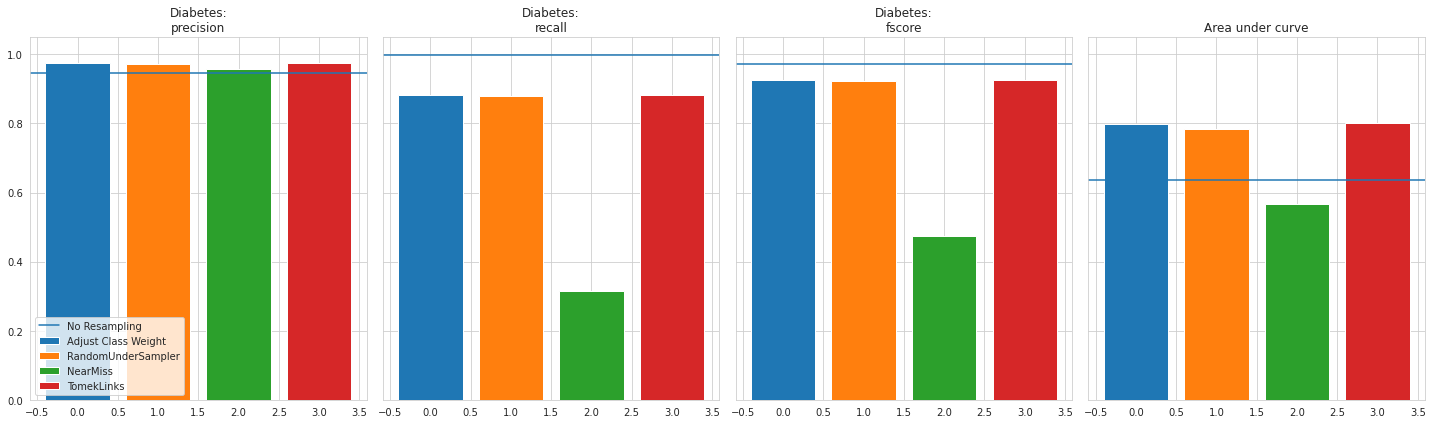

In [45]:
evaluate_method(results_svc, 'undersample')

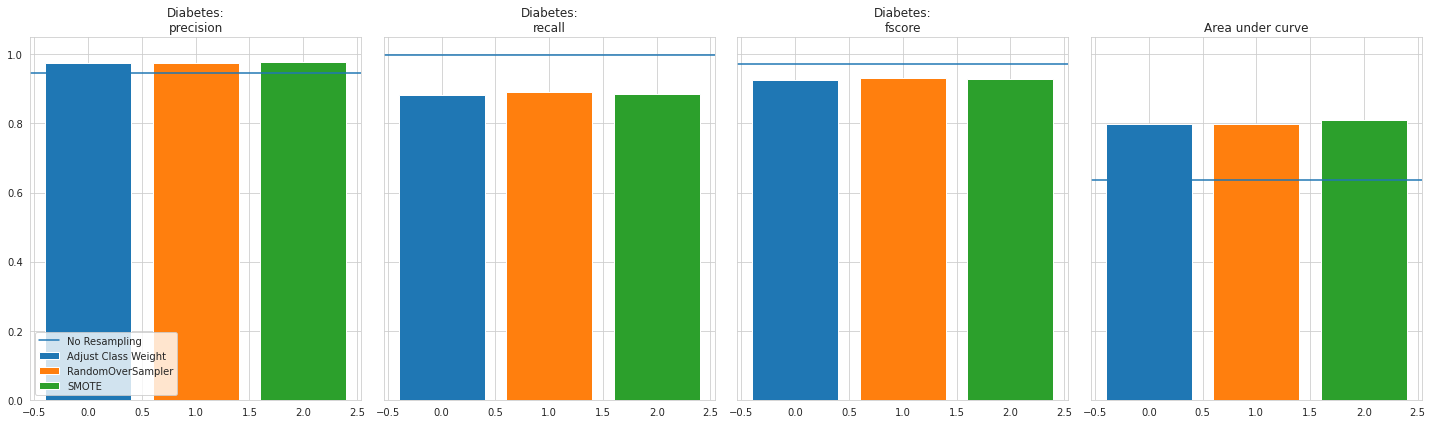

In [46]:
evaluate_method(results_svc, 'oversample')

In [47]:
svc_metrics, svc_metrics_ros, svc_metrics_smote, svc_metrics_rus, svc_metrics_nm, svc_metrics_tl = metrics(results_svc)

In [48]:
index = ['accuracy', 'precision', 'recall', 'F1-score', 'n_occurences','predictions_count', 'tp','tn','fp','fn','auc']
svc_metrics = pd.DataFrame({'Original': svc_metrics, 'RandomOverSampler':svc_metrics_ros, 
                           'SMOTE': svc_metrics_smote, 'RandomUnderSampler':svc_metrics_rus,
                           'NearMiss': svc_metrics_nm,  'TomekLinks': svc_metrics_tl}, index=index)

<a id="DT"></a>

## Decision Tree (DT)

In [49]:
model_tree = DecisionTreeClassifier()
results_tree = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_tree)

-------- Oversampling methods ---------
Technique:RandomOverSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
Technique:SMOTE
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
-------- Undersampling methods ---------
Technique:RandomUnderSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:NearMiss
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:TomekLinks
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26705), (1, 2118)]


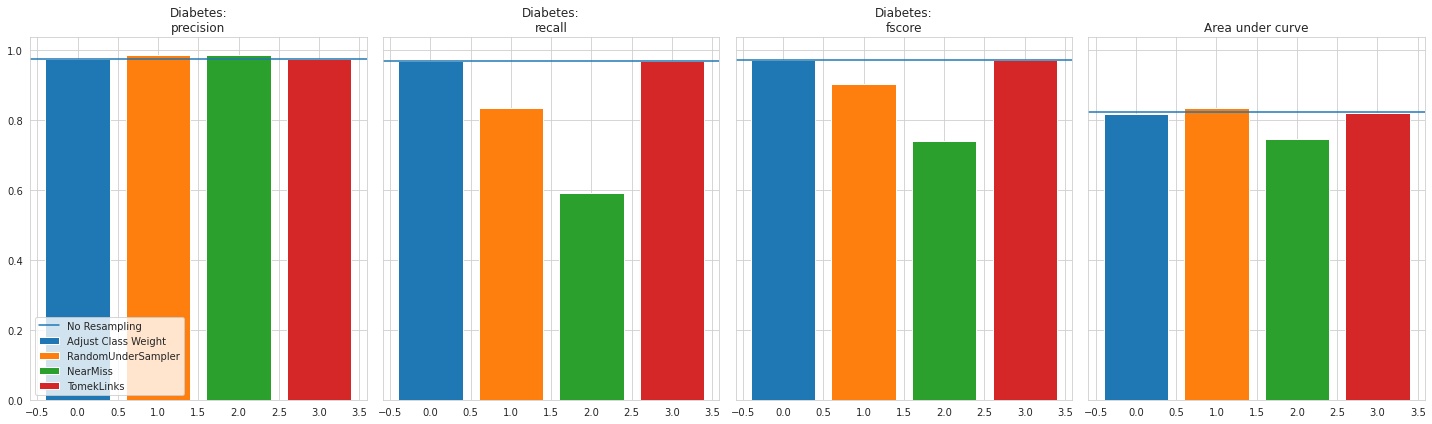

In [50]:
evaluate_method(results_tree, 'undersample')

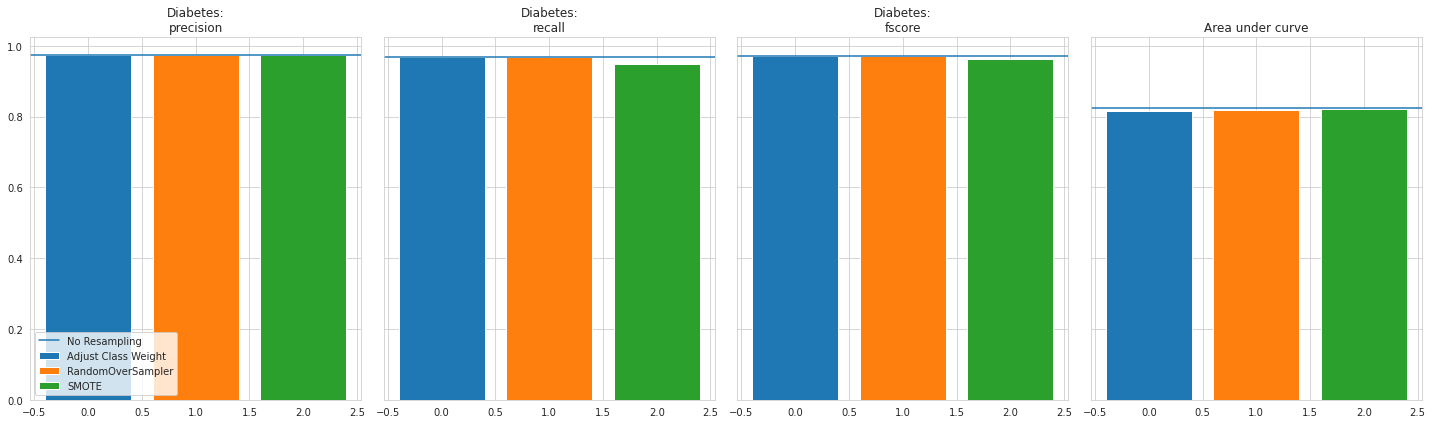

In [51]:
evaluate_method(results_tree, 'oversample')

In [52]:
tree_metrics, tree_metrics_ros, tree_metrics_smote, tree_metrics_rus, tree_metrics_nm, tree_metrics_tl = metrics(results_tree)

In [53]:
index = ['accuracy', 'precision', 'recall', 'F1-score', 'n_occurences','predictions_count', 'tp','tn','fp','fn','auc']
tree_metrics = pd.DataFrame({'Original': tree_metrics, 'RandomOverSampler':tree_metrics_ros, 
                           'SMOTE': tree_metrics_smote, 'RandomUnderSampler':tree_metrics_rus,
                           'NearMiss': tree_metrics_nm,  'TomekLinks': tree_metrics_tl}, index=index)

In [54]:
tree_metrics

,Original,RandomOverSampler,SMOTE,RandomUnderSampler,NearMiss,TomekLinks
accuracy,0.946702,0.947666,0.930588,0.832943,0.614378,0.947528
precision,"[0.9745699326851159, 0.6232638888888888]","[0.9738883915249179, 0.6332737030411449]","[0.9751296917912725, 0.5176803394625177]","[0.9848884203127746, 0.2821656050955414]","[0.9863928748144483, 0.14725069897483692]","[0.974025974025974, 0.6316725978647687]"
recall,"[0.9677658942364825, 0.6786389413988658]","[0.9695484254307783, 0.6691871455576559]","[0.9493464052287581, 0.6918714555765595]","[0.8325906120023767, 0.8374291115311909]","[0.5922459893048129, 0.8960302457466919]","[0.9692513368983957, 0.6710775047258979]"
F1-score,"[0.9711559961243199, 0.6497737556561086]","[0.9717135626023522, 0.6507352941176471]","[0.9620653319283456, 0.5922330097087378]","[0.9023585285357804, 0.42210576464983324]","[0.7401150918878783, 0.25293489861259344]","[0.971632789814608, 0.6507791017415214]"
n_occurences,"[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]"
predictions_count,"{0: 6685, 1: 576}","{0: 6702, 1: 559}","{1: 707, 0: 6554}","{0: 5691, 1: 1570}","{1: 3219, 0: 4042}","{0: 6699, 1: 562}"
tp,359,354,366,443,474,355
tn,6515,6527,6391,5605,3987,6525
fp,217,205,341,1127,2745,207
fn,170,175,163,86,55,174


<a id="GNB"></a>
## Gaussian Naïve Bayes (GNB)

In [55]:
model_gnb = GaussianNB()
results_gnb = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_gnb)

-------- Oversampling methods ---------
Technique:RandomOverSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
Technique:SMOTE
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
-------- Undersampling methods ---------
Technique:RandomUnderSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:NearMiss
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:TomekLinks
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26705), (1, 2118)]


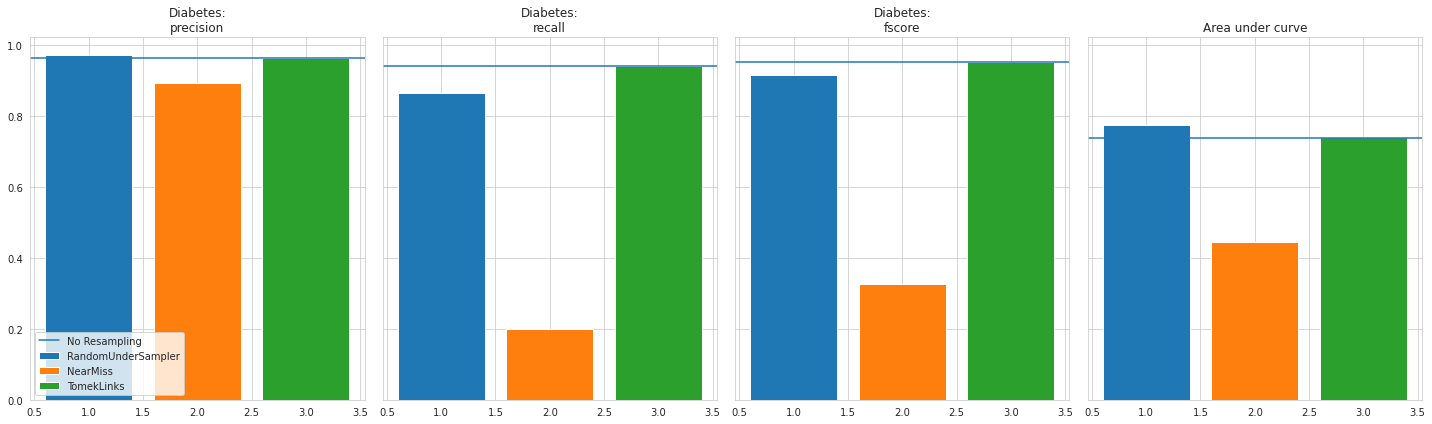

In [56]:
evaluate_method(results_gnb, 'undersample')

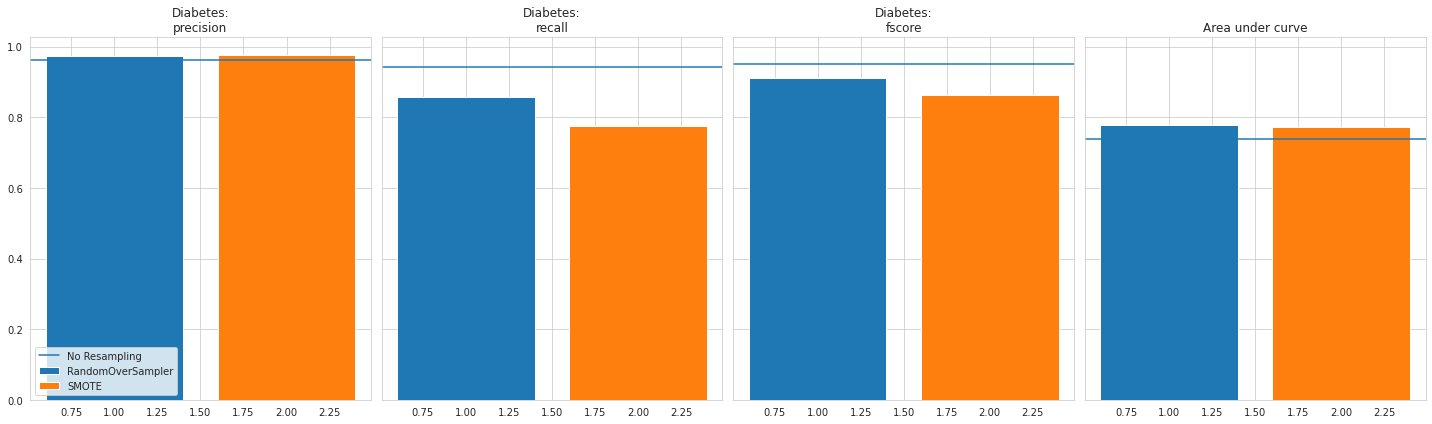

In [57]:
evaluate_method(results_gnb, 'oversample')

In [58]:
gnb_metrics, gnb_metrics_ros, gnb_metrics_smote, gnb_metrics_rus, gnb_metrics_nm, gnb_metrics_tl = metrics(results_gnb)

In [59]:
index = ['accuracy', 'precision', 'recall', 'F1-score', 'n_occurences','predictions_count', 'tp','tn','fp','fn','auc']
gnb_metrics = pd.DataFrame({'Original': gnb_metrics, 'RandomOverSampler':gnb_metrics_ros, 
                           'SMOTE': gnb_metrics_smote, 'RandomUnderSampler':gnb_metrics_rus,
                           'NearMiss': gnb_metrics_nm,  'TomekLinks': gnb_metrics_tl}, index=index)

In [60]:
gnb_metrics

,Original,RandomOverSampler,SMOTE,RandomUnderSampler,NearMiss,TomekLinks
accuracy,0.911858,0.84644,0.773585,0.850709,0.235642,0.911307
precision,"[0.962636695018226, 0.41802067946824223]","[0.9730503621357588, 0.27870090634441086]","[0.977119279819955, 0.21099015033696217]","[0.9720829154129054, 0.2830336200156372]","[0.8913907284768212, 0.06346722309163624]","[0.9627546366676801, 0.4158125915080527]"
recall,"[0.9414735591206179, 0.5349716446124764]","[0.8581402257872847, 0.6975425330812854]","[0.7739156268568034, 0.7693761814744802]","[0.8637849079025549, 0.6843100189035917]","[0.19994058229352346, 0.6899810964083176]","[0.9407308377896613, 0.5368620037807184]"
F1-score,"[0.9519375187744067, 0.46932006633499174]","[0.9119898965979952, 0.39827307069616835]","[0.8637267904509284, 0.33116354759967453]","[0.9147396570709454, 0.40044247787610615]","[0.3266197524872604, 0.11624203821656053]","[0.9516153268219385, 0.4686468646864687]"
n_occurences,"[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]"
predictions_count,"{0: 6584, 1: 677}","{0: 5937, 1: 1324}","{1: 1929, 0: 5332}","{0: 5982, 1: 1279}","{1: 5751, 0: 1510}","{0: 6578, 1: 683}"
tp,283,369,407,362,365,284
tn,6338,5777,5210,5815,1346,6333
fp,394,955,1522,917,5386,399
fn,246,160,122,167,164,245


<a id="KNN"></a>
## K-Nearest Neighbourhood (KNN)

In [61]:
model_knn = KNeighborsClassifier()
results_knn = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_knn)

-------- Oversampling methods ---------
Technique:RandomOverSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
Technique:SMOTE
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]
-------- Undersampling methods ---------
Technique:RandomUnderSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:NearMiss
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:TomekLinks
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26705), (1, 2118)]


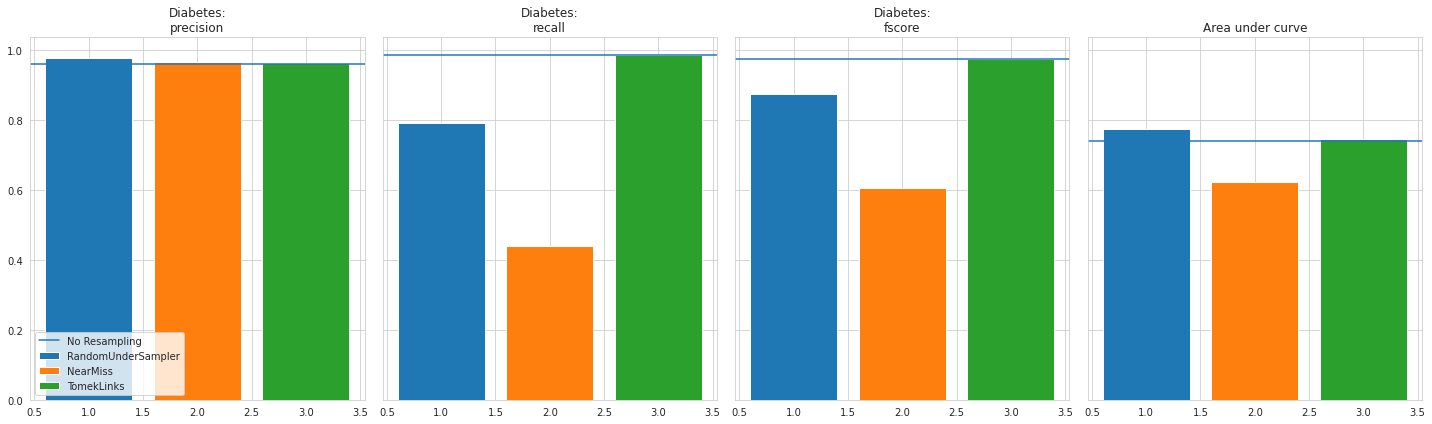

In [62]:
evaluate_method(results_knn, 'undersample')

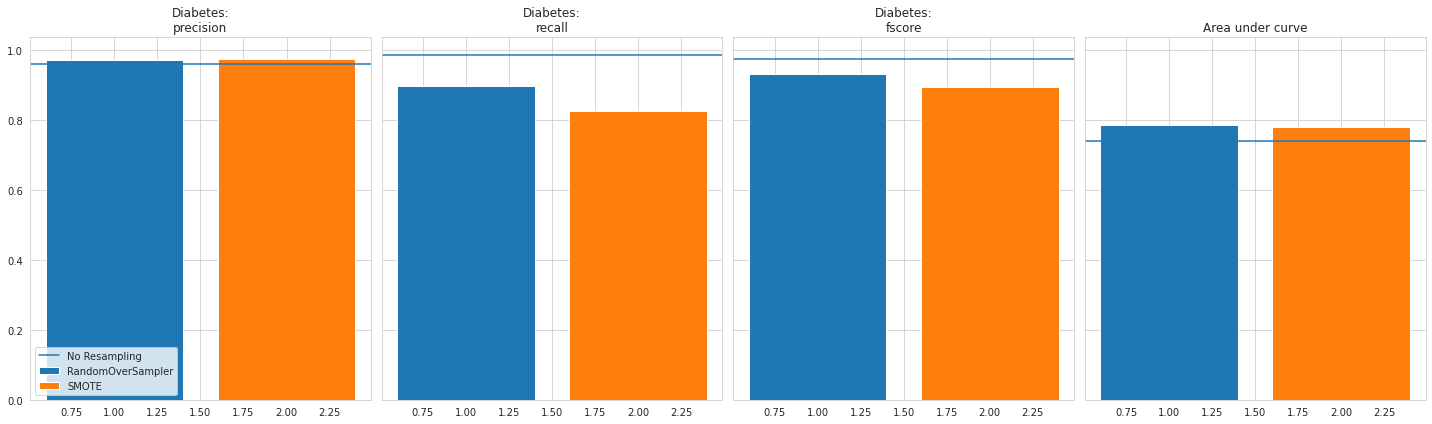

In [63]:
evaluate_method(results_knn, 'oversample')

In [64]:
knn_metrics, knn_metrics_ros, knn_metrics_smote, knn_metrics_rus, knn_metrics_nm, knn_metrics_tl = metrics(results_knn)

In [65]:
index = ['accuracy', 'precision', 'recall', 'F1-score', 'n_occurences','predictions_count', 'tp','tn','fp','fn','auc']
knn_metrics = pd.DataFrame({'Original': knn_metrics, 'RandomOverSampler':knn_metrics_ros, 
                           'SMOTE': knn_metrics_smote, 'RandomUnderSampler':knn_metrics_rus,
                           'NearMiss': knn_metrics_nm,  'TomekLinks': knn_metrics_tl}, index=index)

In [66]:
knn_metrics

,Original,RandomOverSampler,SMOTE,RandomUnderSampler,NearMiss,TomekLinks
accuracy,0.951246,0.880044,0.819584,0.788597,0.466465,0.950282
precision,"[0.9613715277777778, 0.7507163323782235]","[0.9722804190169219, 0.3380681818181818]","[0.9752805049088359, 0.2491971740526654]","[0.9765266825600587, 0.2217920353982301]","[0.9669934640522876, 0.10188050464175197]","[0.9620014503263234, 0.7295081967213115]"
recall,"[0.9870766488413547, 0.4952741020793951]","[0.8961675579322638, 0.6748582230623819]","[0.8263517528223411, 0.7334593572778828]","[0.7909982174688057, 0.7580340264650284]","[0.4395424836601307, 0.8090737240075614]","[0.9852941176470589, 0.504725897920605]"
F1-score,"[0.9740545294635005, 0.5968109339407744]","[0.9326737265208316, 0.4504731861198738]","[0.8946606625924735, 0.3720038350910834]","[0.8740254411161263, 0.3431750106974754]","[0.6043709150326798, 0.18097251585623678]","[0.9735084758200632, 0.5966480446927376]"
n_occurences,"[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]"
predictions_count,"{0: 6912, 1: 349}","{1: 1056, 0: 6205}","{1: 1557, 0: 5704}","{0: 5453, 1: 1808}","{1: 4201, 0: 3060}","{0: 6895, 1: 366}"
tp,262,357,388,401,428,267
tn,6645,6033,5563,5325,2959,6633
fp,87,699,1169,1407,3773,99
fn,267,172,141,128,101,262


<a id="LR"></a>
## Logistic Regression (LR)

In [67]:
model_lr = LogisticRegression()
results_lr = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_lr)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


-------- Oversampling methods ---------
Technique:RandomOverSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Technique:SMOTE
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26923), (1, 26923)]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


-------- Undersampling methods ---------
Technique:RandomUnderSampler
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:NearMiss
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 2118), (1, 2118)]
Technique:TomekLinks
Before resampling: [(0, 26923), (1, 2118)]
After resampling: [(0, 26705), (1, 2118)]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


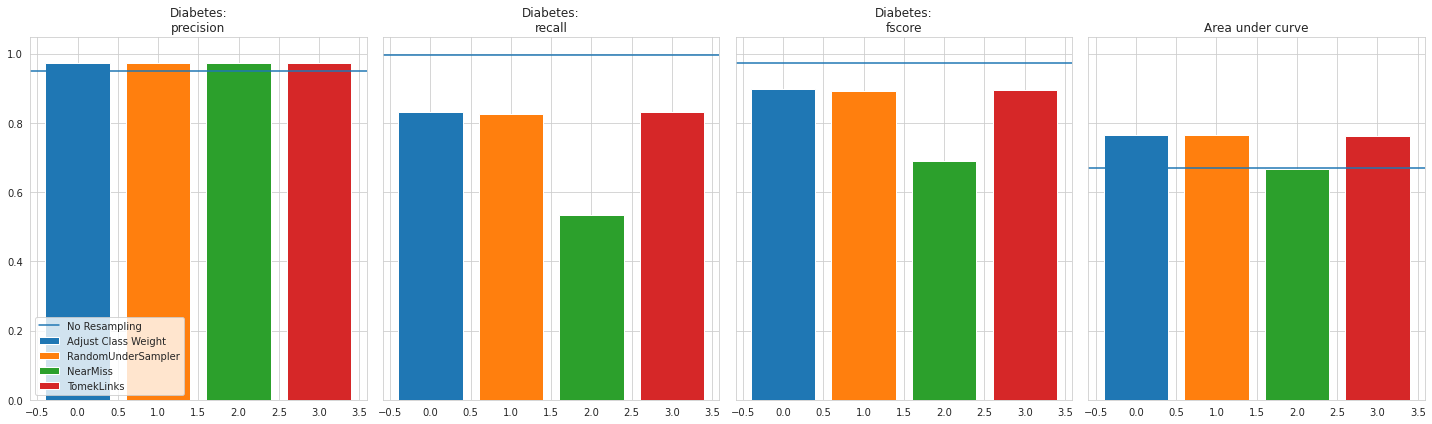

In [68]:
evaluate_method(results_lr, 'undersample')

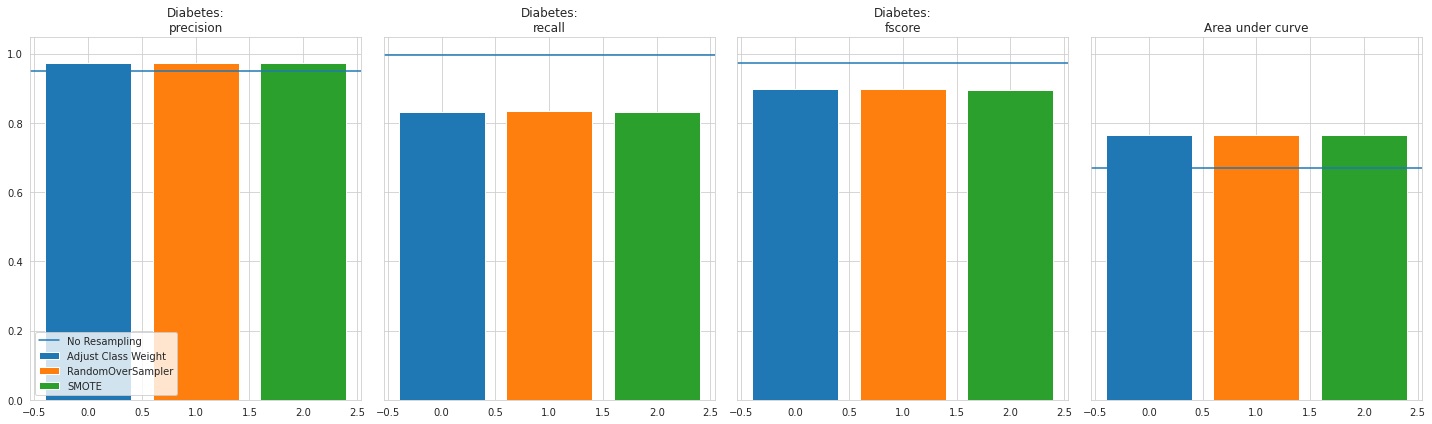

In [69]:
evaluate_method(results_lr, 'oversample')

In [70]:
lr_metrics, lr_metrics_ros, lr_metrics_smote, lr_metrics_rus, lr_metrics_nm, lr_metrics_tl = metrics(results_lr)

In [71]:
index = ['accuracy', 'precision', 'recall', 'F1-score', 'n_occurences','predictions_count', 'tp','tn','fp','fn','auc']
lr_metrics = pd.DataFrame({'Original': lr_metrics, 'RandomOverSampler':lr_metrics_ros, 
                           'SMOTE': lr_metrics_smote, 'RandomUnderSampler':lr_metrics_rus,
                           'NearMiss': lr_metrics_nm,  'TomekLinks': lr_metrics_tl}, index=index)

In [72]:
lr_metrics

,Original,RandomOverSampler,SMOTE,RandomUnderSampler,NearMiss,TomekLinks
accuracy,0.949181,0.824818,0.821237,0.817243,0.553092,0.820824
precision,"[0.9505735731482793, 0.9]","[0.9718285516764604, 0.24813559322033898]","[0.9725217391304348, 0.24553275976174718]","[0.9723824506205209, 0.2409090909090909]","[0.971598593454152, 0.11896745230078563]","[0.9720146010776985, 0.2440318302387268]"
recall,"[0.9970291146761735, 0.34026465028355385]","[0.8352644087938206, 0.6918714555765595]","[0.8306595365418895, 0.7013232514177694]","[0.8263517528223411, 0.7013232514177694]","[0.5335710041592394, 0.8015122873345936]","[0.8306595365418895, 0.6956521739130435]"
F1-score,"[0.9732472993547452, 0.49382716049382713]","[0.8983863236938808, 0.3652694610778443]","[0.8960102547668642, 0.3637254901960784]","[0.8934393318878985, 0.35862735621072983]","[0.6888484034902675, 0.20718299535792817]","[0.8957949539447337, 0.36131566028473244]"
n_occurences,"[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]","[6732, 529]"
predictions_count,"{0: 7061, 1: 200}","{0: 5786, 1: 1475}","{0: 5750, 1: 1511}","{0: 5721, 1: 1540}","{1: 3564, 0: 3697}","{0: 5753, 1: 1508}"
tp,180,366,371,371,424,368
tn,6712,5623,5592,5563,3592,5592
fp,20,1109,1140,1169,3140,1140
fn,349,163,158,158,105,161
